In [0]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sample_data.load_points as lp

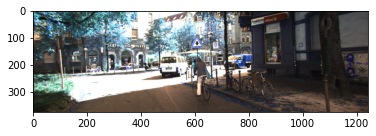

In [141]:
img = cv.imread('sample_data/image.png', cv.IMREAD_UNCHANGED)
plt.imshow(img)

In [0]:
with open('sample_data/K.pkl', 'rb') as fin :
  K = pickle.load(fin)

In [143]:
points = lp.load_velodyne_points('sample_data/lidar-points.bin')
print (points.shape)

(6965, 3)


In [144]:
X0 = np.array([[0.27, 0.06, -0.08]]).T
X0

array([[ 0.27],
       [ 0.06],
       [-0.08]])

In [145]:
K #c must be 721.5377 & x_H and Y_H are the last column values

array([[721.5377,   0.    , 609.5593],
       [  0.    , 721.5377, 172.854 ],
       [  0.    ,   0.    ,   1.    ]])

In [146]:
R_21 = np.array([[0,0,1],[-1,0,0],[0,-1,0]]).T
R_21

array([[ 0, -1,  0],
       [ 0,  0, -1],
       [ 1,  0,  0]])

In [147]:
A = np.identity(3)
J = np.concatenate((A,-X0),axis=1)
J

array([[ 1.  ,  0.  ,  0.  , -0.27],
       [ 0.  ,  1.  ,  0.  , -0.06],
       [ 0.  ,  0.  ,  1.  ,  0.08]])

In [0]:
P = np.matmul(R_21,J)

In [0]:
P_f = np.matmul(K,P)

In [151]:
points.shape

(6965, 3)

In [153]:
b = np.ones(((points.shape)[0],1))
p = np.append(points,b,axis=1)
p.shape

(6965, 4)

In [0]:
proj = np.matmul(P_f,p.T)
projected_image= proj.T

In [158]:
projected_image.shape

(6965, 3)

In [0]:
proj_x = projected_image[:,0]/projected_image[:,2]
proj_y = projected_image[:,1]/projected_image[:,2]

In [166]:
img.shape

(375, 1242, 3)

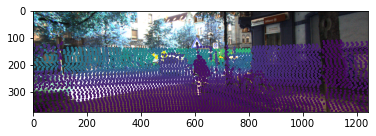

In [178]:
plt.imshow(img)
plt.scatter(proj_x,proj_y,s=2,c=p[:,0]) #since depth in camera coordinate is z, which is x for world
plt.ylim((img.shape[0],0))
plt.xlim((0,img.shape[1]))
plt.show()